### Test CBECI Overlay

This script parses the pre-generated CBECI data for different electricity prices and plots a few of them against each other to demonstrate the heavy sensitivity of the model to cost inputs.

The motivation for this script is that the Cambridge Bitcoin Electricity Consumption Index assumes a constant fixed energy cost of $0.05/kWh, but in the face of rising energy prices there is desire to modify the output of the index to be more reflective of dynamic energy prices.

- Author: [Data Always](dataalways.substack.com)
- Last Modified: November 15, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(
    rc={"figure.figsize":(10, 6.5), 
        "figure.subplot.left":0.10,
        "figure.subplot.right":0.95,
        "figure.subplot.top":0.92,
    }
)

In [2]:
df = pd.read_csv(
    f"../datasets/cbeci-annualized-consumption.csv"
)

df['date'] = [pd.to_datetime(x) for x in df['date']]

In [3]:
df.tail()

,date,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19
4517,2022-11-29,137.894053,124.437991,103.033660,93.336381,82.145260,76.042332,67.307254,63.196589,54.564699,49.395412,49.395412,52.661763,63.26991,52.113412,57.618272,50.858529,48.843833,45.716266,42.366663
4518,2022-11-30,137.438493,124.026886,102.693269,93.028027,81.873877,75.791112,67.084891,62.987807,54.384434,49.232225,49.232225,52.661763,63.26991,52.113412,57.618272,50.858529,48.843833,45.716266,42.366663
4519,2022-12-01,141.083217,127.315949,105.416586,95.495032,84.045086,77.801012,68.863912,64.658177,55.826652,50.537812,50.537812,52.661763,63.26991,52.113412,57.618272,50.858529,48.843833,45.716266,42.366663
4520,2022-12-02,141.386896,127.589994,105.643493,95.700583,84.225991,77.968478,69.012140,64.797352,55.946818,50.646593,50.646593,52.661763,63.26991,52.113412,57.618272,50.858529,48.843833,45.716266,42.366663
4521,2022-12-03,144.727941,130.605011,108.139903,97.962037,86.216295,79.810913,70.642932,66.328547,57.268870,51.843398,51.843398,52.661763,63.26991,52.113412,57.618272,50.858529,48.843833,45.716266,42.366663


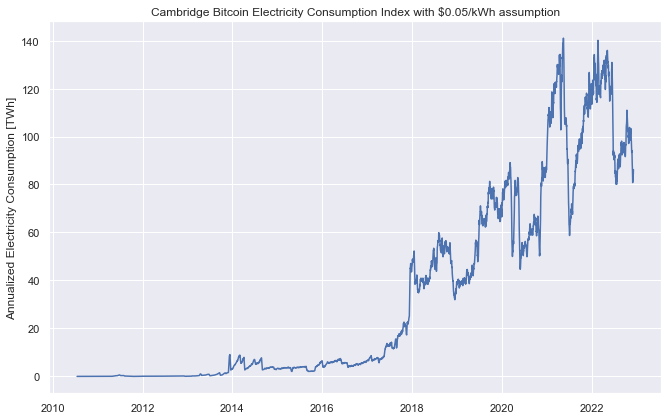

In [4]:
## First generate a simple lineplot that reproduces the default CBECI assumption

sns.lineplot(
    x=df['date'], 
    y=df['0.05'],
)
plt.title('Cambridge Bitcoin Electricity Consumption Index with $0.05/kWh assumption')
plt.xlabel('')
plt.ylabel('Annualized Electricity Consumption [TWh]')

plt.savefig(
    '../tmp-figures/cbeci-default.png', 
    transparent=False, 
    facecolor='w'
)
plt.show()

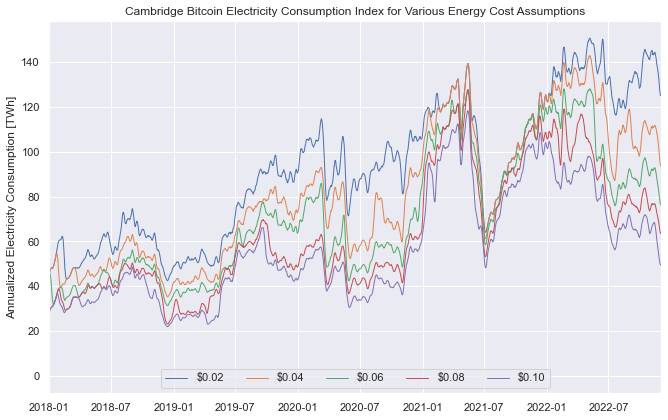

In [5]:
# Let's generate profiles for some different price assumptions since 2018

prices_to_plot = [0.02, 0.04, 0.06, 0.08, 0.10]
# Plot in 0.02 increments from 0.02 to 0.10 

smoothing = 7
# Let's smooth the data on a 7-day rolling average

# For each specified price, plot the profile
for xx in prices_to_plot:
    sns.lineplot(
        x=df['date'], 
        y=df["{:.2f}".format(xx)].rolling(smoothing).mean(),
        lw=1
    )

plt.title('Cambridge Bitcoin Electricity Consumption Index for Various Energy Cost Assumptions')
plt.xlabel('')
plt.ylabel('Annualized Electricity Consumption [TWh]')
plt.xlim([pd.to_datetime('2018-01-01'), df['date'][len(df)-1]])

plt.legend(
    labels=["${:.2f}".format(x) for x in prices_to_plot],
     ncol=5, 
     loc='lower center',
)

plt.savefig(
    '../tmp-figures/cbeci-various.png', 
    transparent=False, 
    facecolor='w'
)
plt.show()

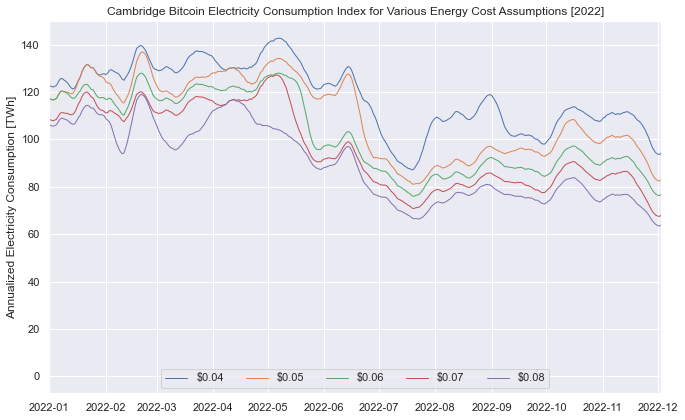

In [6]:
# Let's generate profiles for some different price assumptions in 2022

prices_to_plot = [0.04, 0.05, 0.06, 0.07, 0.08]
# Plot in 0.01 increments from 0.04 to 0.08

smoothing = 7
# Let's smooth the data on a 7-day rolling average

# For each specified price, plot the profile
for xx in prices_to_plot:
    sns.lineplot(
        x=df['date'], 
        y=df["{:.2f}".format(xx)].rolling(smoothing).mean(),
        lw=1
    )

plt.title('Cambridge Bitcoin Electricity Consumption Index for Various Energy Cost Assumptions [2022]')
plt.xlabel('')
plt.ylabel('Annualized Electricity Consumption [TWh]')
plt.xlim([pd.to_datetime('2022-01-01'), df['date'][len(df)-1]])

plt.legend(
    labels=["${:.2f}".format(x) for x in prices_to_plot],
     ncol=5, 
     loc='lower center',
)

plt.savefig(
    '../tmp-figures/cbeci-various-2022.png', 
    transparent=False, 
    facecolor='w'
)
plt.show()